In [11]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

google = yf.Ticker("GOOG")

In [3]:
google.info

{'zip': '94043',
 'sector': 'Communication Services',
 'fullTimeEmployees': 139995,
 'longBusinessSummary': 'Alphabet Inc. provides online advertising services in the United States, Europe, the Middle East, Africa, the Asia-Pacific, Canada, and Latin America. The company offers performance and brand advertising services. It operates through Google Services, Google Cloud, and Other Bets segments. The Google Services segment provides products and services, such as ads, Android, Chrome, hardware, Google Maps, Google Play, Search, and YouTube, as well as technical infrastructure; and digital content. The Google Cloud segment offers infrastructure and data analytics platforms, collaboration tools, and other services for enterprise customers. The Other Bets segment sells internet and TV services, as well as licensing and research and development services. The company was founded in 1998 and is headquartered in Mountain View, California.',
 'city': 'Mountain View',
 'phone': '650-253-0000',
 

In [4]:
df = google.history(period='1d', interval="1m")
print(df.head())

                                  Open         High          Low        Close  \
Datetime                                                                        
2021-05-26 09:30:00-04:00  2412.834961  2418.199951  2412.834961  2416.870117   
2021-05-26 09:31:00-04:00  2417.860107  2420.199951  2416.429932  2417.929932   
2021-05-26 09:32:00-04:00  2417.540527  2418.000000  2417.419922  2418.000000   
2021-05-26 09:33:00-04:00  2417.070068  2417.070068  2413.709717  2413.975098   
2021-05-26 09:34:00-04:00  2413.459961  2415.100098  2412.514893  2415.020020   

                           Volume  Dividends  Stock Splits  
Datetime                                                    
2021-05-26 09:30:00-04:00   27448          0             0  
2021-05-26 09:31:00-04:00    7896          0             0  
2021-05-26 09:32:00-04:00    1911          0             0  
2021-05-26 09:33:00-04:00    2548          0             0  
2021-05-26 09:34:00-04:00   12142          0             0  


In [5]:
df = google.history(period='1d', interval="1m")
df = df[['Low']]
df.head()

,Low
Datetime,
2021-05-26 09:30:00-04:00,2412.834961
2021-05-26 09:31:00-04:00,2416.429932
2021-05-26 09:32:00-04:00,2417.419922
2021-05-26 09:33:00-04:00,2413.709717
2021-05-26 09:34:00-04:00,2412.514893


In [9]:
df['date'] = pd.to_datetime(df.index).time
df.set_index('date', inplace=True)
df.head()

,Low
date,
09:30:00,2412.834961
09:31:00,2416.429932
09:32:00,2417.419922
09:33:00,2413.709717
09:34:00,2412.514893


In [10]:
X = df.index.values
y = df['Low'].values
# The split point is the 10% of the dataframe length
offset = int(0.10*len(df))
X_train = X[:-offset]
y_train = y[:-offset]
X_test  = X[-offset:]
y_test  = y[-offset:]

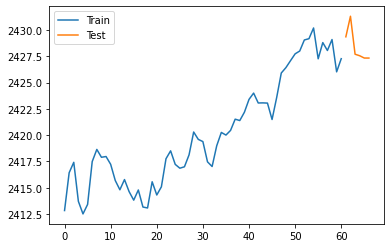

In [12]:
plt.plot(range(0,len(y_train)),y_train, label='Train')
plt.plot(range(len(y_train),len(y)),y_test,label='Test')
plt.legend()
plt.show()

In [13]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(y_train, order=(5,0,1)).fit()
forecast = model.forecast(steps=1)[0]

In [16]:
print(f'Real data for time 0: {y_train[len(y_train)-1]}')
print(f'Real data for time 1: {y_test[0]}')
print(f'Pred data for time 1: {forecast}')



Real data for time 0: 2427.27001953125
Real data for time 1: 2429.35009765625
Pred data for time 1: 2427.0723180445793
